In [10]:
# Importing the data
import pandas as pd
DataIris = pd.read_csv('IRIS.csv')
DataIris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Keeping the target variable for future reference
TargetVariable=DataIris['class']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=DataIris.drop('class', axis=1)

OnlyPredictors.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# Taking out only the Predictor variables
y=TargetVariable.values
X=OnlyPredictors.values

# Printing some sample records
print(X[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


## Hierarchical Clustering

In [13]:
## Finding Optimal Number of clusters using silhouette score
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Defining the list of clusters to try
n_clusters_list=np.arange(start=2, stop=10, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for n_clusters_trial in n_clusters_list:
   
        
    # Generating Hierarchical clusters
    from sklearn.cluster import AgglomerativeClustering
    hc = AgglomerativeClustering(n_clusters=n_clusters_trial, affinity = 'euclidean', linkage = 'ward')
        
    if(len(np.unique(hc.fit_predict(X)))>1):
        sil_score=silhouette_score(X, hc.fit_predict(X))
    else:
        continue
    
    # Appending the result of each iteration
    silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,n_clusters_trial]], 
                                                                          columns=["score", "Clusters"]))

In [14]:
silhouette_scores_data

,score,Clusters
0,0.686393,2
0,0.554097,3
0,0.488740,4
0,0.484155,5
0,0.361885,6
0,0.344854,7
0,0.346241,8
0,0.333139,9


In [15]:
# Finding out the best nmber of clusters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,Clusters
0,0.686393,2


   sepallength  sepalwidth  petallength  petalwidth        class  \
0          5.1         3.5          1.4         0.2  Iris-setosa   
1          4.9         3.0          1.4         0.2  Iris-setosa   
2          4.7         3.2          1.3         0.2  Iris-setosa   
3          4.6         3.1          1.5         0.2  Iris-setosa   
4          5.0         3.6          1.4         0.2  Iris-setosa   

   PredictedClusterID  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  


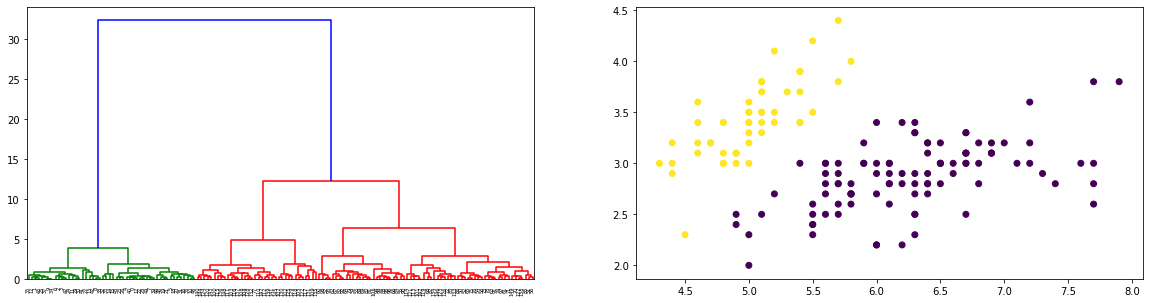

In [16]:
# Hierarchical Clustering

import matplotlib.pyplot as plt
fig, subPlots=plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# create dendrogram to find best number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), ax=subPlots[0])


##################################################################
# Creating 3 Clusters Based on the above dendogram visually
# Bottom-Up hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')

# Generating cluster id for each row using agglomerative algorithm
DataIris['PredictedClusterID']=hc.fit_predict(X)
print(DataIris.head())
 
# Plotting the predicted clusters
plt.scatter(x=DataIris['sepallength'], y=DataIris['sepalwidth'], c=DataIris['PredictedClusterID'])

# Use of Linkage
# "ward" minimizes the variance of the clusters being merged.
# "average" uses the average of the distances of each observation of the two sets.
# "complete" or maximum linkage uses the maximum distances between all observations of the two sets.